In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [2]:
df1 = pd.read_csv("marathon_results_2022.csv", header=0)
df2 = pd.read_csv("marathon_results_2023.csv", header=0)
df3 = pd.read_csv("marathon_results_2024.csv", header=0)


In [3]:
df1.head()

Bib               Name  Age M/F      City State Country Citizen Unnamed: 8  \
0    4      Chebet, Evans   33   M  Kapsabet   NaN     KEN     NaN        NaN   
1    5  Cherono, Lawrence   33   M   Eldoret   NaN     KEN     NaN        NaN   
2    1    Kipruto, Benson   31   M  Kapsabet   NaN     KEN     NaN        NaN   
3    9      Geay, Gabriel   25   M     Tampa    FL     USA     TAN        NaN   
4   11     Kiptanui, Eric   31   M       NaN   NaN     KEN     NaN        NaN   

        5K  ...      25K      30K      35K      40K     Pace Proj Time  \
0  0:14:58  ...  1:15:27  1:31:00  1:46:31  2:00:26  0:04:51       NaN   
1  0:14:58  ...  1:15:28  1:31:00  1:46:33  2:00:44  0:04:52       NaN   
2  0:14:58  ...  1:15:28  1:30:59  1:46:33  2:00:45  0:04:52       NaN   
3  0:14:57  ...  1:15:27  1:31:00  1:46:31  2:00:59  0:04:53       NaN   
4  0:14:57  ...  1:15:28  1:30:59  1:46:36  2:01:53  0:04:55       NaN   

  Official Time Overall Gender Division  
0       2:06:51       1      1        1  
1       2:07:21       2      2        2  
2       2:07:27       3      3        3  
3       2:07:53       4      4        4  
4       2:08:47       5      5        5  

[5 rows x 24 columns]

In [4]:
df2.head()

Bib             Name  Age M/F      City State Country Citizen Unnamed: 8  \
0   1    Chebet, Evans   34   M  Kapsabet   NaN     KEN     NaN        NaN   
1   3    Geay, Gabriel   26   M     Tampa    FL     USA     TAN        NaN   
2   5  Kipruto, Benson   32   M  Kapsabet   NaN     KEN     NaN        NaN   
3  19    Korir, Albert   29   M       NaN   NaN     KEN     NaN        NaN   
4  31   Talbi, Zouhair   28   M       NaN   NaN     MAR     NaN        NaN   

        5K  ...      25K      30K      35K      40K     Pace Proj Time  \
0  0:14:18  ...  1:14:05  1:29:24  1:44:19  1:59:14  0:04:48       NaN   
1  0:14:18  ...  1:14:04  1:29:23  1:44:20  1:59:15  0:04:49       NaN   
2  0:14:17  ...  1:14:05  1:29:24  1:44:19  1:59:14  0:04:49       NaN   
3  0:14:17  ...  1:14:06  1:29:24  1:45:16  2:01:00  0:04:53       NaN   
4  0:14:19  ...  1:14:08  1:29:46  1:45:30  2:01:13  0:04:54       NaN   

  Official Time Overall Gender Division  
0       2:05:54       1      1        1  
1       2:06:04       2      2        2  
2       2:06:06       3      3        3  
3       2:08:01       4      4        4  
4       2:08:35       5      5        5  

[5 rows x 24 columns]

In [5]:
df3.head()

Bib           Name  Age M/F         City State Country Citizen Unnamed: 8  \
0   2   Lemma, Sisay   33   M  Addis Ababa   NaN     ETH     NaN        NaN   
1   8   Esa, Mohamed   23   M  Addis Ababa   NaN     ETH     NaN        NaN   
2   1  Chebet, Evans   35   M     Kapsabet   NaN     KEN     NaN        NaN   
3   7    Korir, John   27   M      Eldoret   NaN     KEN     NaN        NaN   
4  14  Korir, Albert   30   M      Nairobi   NaN     KEN     NaN        NaN   

        5K  ...      25K      30K      35K      40K     Pace Proj Time  \
0  0:14:21  ...  1:11:44  1:26:56  1:42:56  1:58:51  0:04:49         -   
1  0:14:22  ...  1:14:08  1:29:46  1:45:14  2:00:24  0:04:51         -   
2  0:14:21  ...  1:14:05  1:29:45  1:45:10  2:00:13  0:04:52         -   
3  0:14:22  ...  1:14:06  1:29:45  1:45:10  2:00:13  0:04:53         -   
4  0:14:22  ...  1:14:06  1:29:45  1:45:10  2:00:45  0:04:53         -   

  Official Time Overall Gender Division  
0       2:06:17       1      1      1.0  
1       2:06:58       2      2      2.0  
2       2:07:22       3      3      3.0  
3       2:07:40       4      4      4.0  
4       2:07:47       5      5      5.0  

[5 rows x 24 columns]

In [6]:
combined_df = pd.concat([df1, df2, df3])

In [7]:
combined_df.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       'Unnamed: 8', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender',
       'Division'],
      dtype='object')

In [8]:
combined_df.shape

(77012, 24)

In [9]:
combined_df.dtypes

Bib               object
Name              object
Age                int64
M/F               object
City              object
State             object
Country           object
Citizen           object
Unnamed: 8        object
5K                object
10K               object
15K               object
20K               object
Half              object
25K               object
30K               object
35K               object
40K               object
Pace              object
Proj Time         object
Official Time     object
Overall            int64
Gender             int64
Division         float64
dtype: object

In [10]:
combined_df.info

<bound method DataFrame.info of          Bib                          Name  Age M/F               City State  \
0          4                 Chebet, Evans   33   M           Kapsabet   NaN   
1          5             Cherono, Lawrence   33   M            Eldoret   NaN   
2          1               Kipruto, Benson   31   M           Kapsabet   NaN   
3          9                 Geay, Gabriel   25   M              Tampa    FL   
4         11                Kiptanui, Eric   31   M                NaN   NaN   
...      ...                           ...  ...  ..                ...   ...   
25549   7771               Grossi, Anthony   63   M        Chattanooga    TN   
25550  15778                  Ratier, John   66   M  Surfside Beach Sc    SC   
25551  10001  Bin Mohd Ali, Mohamad Taufik   46   M      Petaling Jaya   NaN   
25552   7318                   Mey, Johnny   40   M      Silver Spring    MD   
25553   7786                 Weiland, Gary   44   M             Ponder    TX   

      C

In [11]:
combined_df.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       'Unnamed: 8', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender',
       'Division'],
      dtype='object')

Dropping Columns for the following reasons:
Unnamed 8 - no data;
State - missing values not needed in the purpose of analysis;
Citizen - missing values nd not needed for purpose of analysis;
Gender - numerical order not true value of M/F; 
Proj Time - missing majority of values 

In [13]:
combined_df = combined_df.drop(columns=['Unnamed: 8', 'State', 'Citizen', 'Gender', 'Proj Time'])

In [14]:
combined_df.describe()

Age       Overall      Division
count  77012.000000  77012.000000  77011.000000
mean      43.520179  12846.174116   1419.525354
std       11.838356   7428.663146   1261.562682
min       18.000000      1.000000      1.000000
25%       35.000000   6418.000000    452.000000
50%       43.000000  12835.500000   1040.000000
75%       52.000000  19253.000000   1927.000000
max       82.000000  26623.000000   5286.000000

In [15]:
combined_df.dtypes

Bib               object
Name              object
Age                int64
M/F               object
City              object
Country           object
5K                object
10K               object
15K               object
20K               object
Half              object
25K               object
30K               object
35K               object
40K               object
Pace              object
Official Time     object
Overall            int64
Division         float64
dtype: object

In [16]:
combined_df['M/F'] = combined_df['M/F'].str.strip().str.upper()
combined_df['M/F'] = combined_df['M/F'].replace({'MALE': 0, 'FEMALE': 1, 'M': 0, 'F': 1, 'X': 2})
combined_df['M/F'] = pd.to_numeric(combined_df['M/F'])

C:\Users\steph\AppData\Local\Temp\ipykernel_6872\2141469861.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['M/F'] = combined_df['M/F'].replace({'MALE': 0, 'FEMALE': 1, 'M': 0, 'F': 1, 'X': 2})


In [17]:
combined_df['M/F'].unique()

array([0, 1, 2], dtype=int64)

In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77012 entries, 0 to 25553
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bib            77012 non-null  object 
 1   Name           77012 non-null  object 
 2   Age            77012 non-null  int64  
 3   M/F            77012 non-null  int64  
 4   City           76964 non-null  object 
 5   Country        77011 non-null  object 
 6   5K             77012 non-null  object 
 7   10K            77012 non-null  object 
 8   15K            77012 non-null  object 
 9   20K            77012 non-null  object 
 10  Half           77012 non-null  object 
 11  25K            77012 non-null  object 
 12  30K            77012 non-null  object 
 13  35K            77012 non-null  object 
 14  40K            77012 non-null  object 
 15  Pace           77012 non-null  object 
 16  Official Time  77012 non-null  object 
 17  Overall        77012 non-null  int64  
 18  Division   

In [19]:
#check to see how many missing values are in the combined dataset
combined_df.isnull().sum()

Bib               0
Name              0
Age               0
M/F               0
City             48
Country           1
5K                0
10K               0
15K               0
20K               0
Half              0
25K               0
30K               0
35K               0
40K               0
Pace              0
Official Time     0
Overall           0
Division          1
dtype: int64

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Begin to clean and impute missing values

In [22]:
#Get the number of missing values per column
missing_counts = combined_df.isnull().sum()
print("Missing Value Counts per Column:\n", missing_counts)

#Get the percentage of missing values per column
missing_percentages = (combined_df.isnull().sum() / len(combined_df)) * 100
print("n\Missing Value Percentages per Column:\n", missing_percentages)

<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
C:\Users\steph\AppData\Local\Temp\ipykernel_6872\731494509.py:7: SyntaxWarning: invalid escape sequence '\M'
  print("n\Missing Value Percentages per Column:\n", missing_percentages)


Missing Value Counts per Column:
 Bib               0
Name              0
Age               0
M/F               0
City             48
Country           1
5K                0
10K               0
15K               0
20K               0
Half              0
25K               0
30K               0
35K               0
40K               0
Pace              0
Official Time     0
Overall           0
Division          1
dtype: int64
n\Missing Value Percentages per Column:
 Bib              0.000000
Name             0.000000
Age              0.000000
M/F              0.000000
City             0.062328
Country          0.001298
5K               0.000000
10K              0.000000
15K              0.000000
20K              0.000000
Half             0.000000
25K              0.000000
30K              0.000000
35K              0.000000
40K              0.000000
Pace             0.000000
Official Time    0.000000
Overall          0.000000
Division         0.001298
dtype: float64


In [23]:
import numpy as np

# Check for zeros and NaNs in the relevant columns
print("Checking for zeros and NaNs:")
print(f"5K has zeros: { (combined_df['5K'] == 0).any() }")
print(f"10K has zeros: { (combined_df['10K'] == 0).any() }")
print(f"Half has zeros: { (combined_df['Half'] == 0).any() }")
print(f"Official Time has zeros: { (combined_df['Official Time'] == 0).any() }")

print(f"5K has NaNs: { combined_df['5K'].isnull().any() }")
print(f"10K has NaNs: { combined_df['10K'].isnull().any() }")
print(f"Half has NaNs: { combined_df['Half'].isnull().any() }")
print(f"Official Time has NaNs: { combined_df['Official Time'].isnull().any() }")


Checking for zeros and NaNs:
5K has zeros: False
10K has zeros: False
Half has zeros: False
Official Time has zeros: False
5K has NaNs: False
10K has NaNs: False
Half has NaNs: False
Official Time has NaNs: False


In [24]:
#Define the distances for each time point
distances = {'5K': 5, '10K': 10, '15K': 15, '20K': 20, 'Half': 21.0975, '25K': 25, '30K': 30, '35K': 35, '40K': 40}
times = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K']

#create a mask for missing values
missing_mask = combined_df[times].isnull()

#create a new DataFrame to store the inputed values
imputed_values = pd.DataFrame(index=combined_df.index, columns=times)

#itterate through each time column to impute missing values
for time in times:
    missing_indices = missing_mask[time]
    for index in missing_indices[missing_indices].index:
        row = combined_df.loc[index]
        available_times = [t for t in times if not (isinstance(row[t].values[0], (int, float)) and np.isnan(row[t].values[0]))]

        if not available_times:
            # Impute with median time if no available times
            median_time = combined_df[time].median()
            imputed_values.loc[index, time] = median_time
            continue
                
        # Find the closest available times
        lower_time = None
        upper_time = None
        lower_dist = 0
        upper_dist = 0
        missing_dist = distances[time]

        for available_time in available_times:
            dist = distances[available_time]
            if dist < missing_dist and (lower_dist == 0 or dist > lower_dist):
                lower_time = available_time
                lower_dist = dist
            elif dist > missing_dist and (upper_dist == 0 or dist < upper_dist):
                upper_time = available_time
                upper_dist = dist

        if lower_time is not None and upper_time is not None:
            # Linear interpolation between closest times
            time_diff = row[upper_time] - row[lower_time] if upper_time is not None and lower_time is not None else np.nan
            dist_diff = distances[upper_time] - distances[lower_time] if upper_time is not None and lower_time is not None else np.nan
            missing_time_diff = (missing_dist - distances[lower_time]) * (time_diff / dist_diff) if upper_time is not None and lower_time is not None and dist_diff != 0 else np.nan
            imputed_time = row[lower_time] + missing_time_diff if lower_time is not None else np.nan
            imputed_values.loc[index, time] = imputed_time

        elif lower_time is not None:
            # Extrapolate from the lower time
            time_diff = row[available_times[0]] / distances[available_times[0]] #average pace
            imputed_time = time_diff * missing_dist
            imputed_values.loc[index, time] = imputed_time
        elif upper_time is not None:
            # Extrapolate from the upper time.
            time_diff = row[available_times[0]] / distances[available_times[0]] #average pace
            imputed_time = time_diff * missing_dist
            imputed_values.loc[index, time] = imputed_time
        else:
            imputed_values.loc[index, time] = imputed_time = np.nan #if no times are available, impute with NaN

    # Update original DataFrame with inputed values
    combined_df[times] = combined_df[times].fillna(imputed_values)

#Verify Imputation
times_to_check = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K']
print(combined_df[times_to_check].isnull().sum())
print(combined_df[times_to_check].head(15))

5K      0
10K     0
15K     0
20K     0
Half    0
25K     0
30K     0
35K     0
40K     0
dtype: int64
         5K      10K      15K      20K     Half      25K      30K      35K  \
0   0:14:58  0:29:40  0:44:45  1:00:03  1:03:26  1:15:27  1:31:00  1:46:31   
1   0:14:58  0:29:40  0:44:45  1:00:02  1:03:27  1:15:28  1:31:00  1:46:33   
2   0:14:58  0:29:39  0:44:45  1:00:02  1:03:26  1:15:28  1:30:59  1:46:33   
3   0:14:57  0:29:40  0:44:44  1:00:03  1:03:26  1:15:27  1:31:00  1:46:31   
4   0:14:57  0:29:40  0:44:44  1:00:03  1:03:26  1:15:28  1:30:59  1:46:36   
5   0:14:58  0:29:39  0:44:44  1:00:02  1:03:26  1:15:28  1:30:59  1:46:37   
6   0:14:57  0:29:54  0:45:17  1:01:00  1:04:26  1:16:32  1:31:48  1:47:07   
7   0:14:56  0:29:40  0:44:44  1:00:02  1:03:26  1:15:28  1:31:00  1:46:34   
8   0:14:57  0:29:40  0:44:44  1:00:02  1:03:25  1:15:28  1:30:59  1:46:38   
9   0:14:57  0:29:39  0:44:44  1:00:02  1:03:26  1:15:28  1:30:59  1:46:33   
10  0:14:59  0:29:40  0:44:45  1:00:03 

In [25]:
# Check for zeros and NaNs in the relevant columns
print("Checking for zeros and NaNs:")
print(f"5K has zeros: { (combined_df['5K'] == 0).any() }")
print(f"10K has zeros: { (combined_df['10K'] == 0).any() }")
print(f"15K has zeros: { (combined_df['15K'] == 0).any() }")
print(f"20K has zeros: { (combined_df['20K'] == 0).any() }")
print(f"Half has zeros: { (combined_df['Half'] == 0).any() }")
print(f"25K has zeros: { (combined_df['25K'] == 0).any() }")
print(f"30K has zeros: { (combined_df['30K'] == 0).any() }")
print(f"35K has zeros: { (combined_df['35K'] == 0).any() }")
print(f"40K has zeros: { (combined_df['40K'] == 0).any() }")
print(f"Official Time has zeros: { (combined_df['Official Time'] == 0).any() }")

print(f"5K has NaNs: { combined_df['5K'].isnull().any() }")
print(f"10K has NaNs: { combined_df['10K'].isnull().any() }")
print(f"15K has NaNs: { combined_df['15K'].isnull().any() }")
print(f"20K has NaNs: { combined_df['20K'].isnull().any() }")
print(f"Half has NaNs: { combined_df['Half'].isnull().any() }")
print(f"25K has NaNs: { combined_df['25K'].isnull().any() }")
print(f"30K has NaNs: { combined_df['30K'].isnull().any() }")
print(f"35K has NaNs: { combined_df['35K'].isnull().any() }")
print(f"40K has NaNs: { combined_df['40K'].isnull().any() }")
print(f"Official Time has NaNs: { combined_df['Official Time'].isnull().any() }")



Checking for zeros and NaNs:
5K has zeros: False
10K has zeros: False
15K has zeros: False
20K has zeros: False
Half has zeros: False
25K has zeros: False
30K has zeros: False
35K has zeros: False
40K has zeros: False
Official Time has zeros: False
5K has NaNs: False
10K has NaNs: False
15K has NaNs: False
20K has NaNs: False
Half has NaNs: False
25K has NaNs: False
30K has NaNs: False
35K has NaNs: False
40K has NaNs: False
Official Time has NaNs: False


In [26]:
list_timeseries = ['5K','10K', '15K', '20K', 'Half','25K', '30K', '35K', '40K', 'Pace', 'Official Time']

for series in list_timeseries:
    combined_df[series]= pd.to_timedelta(combined_df[series], errors='coerce')

In [27]:
#Convert Columns to minutes
columns_to_convert = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']  # Add all the columns you want to convert

for col in columns_to_convert:
    combined_df[col] = (combined_df[col].dt.total_seconds() / 60).astype(float)

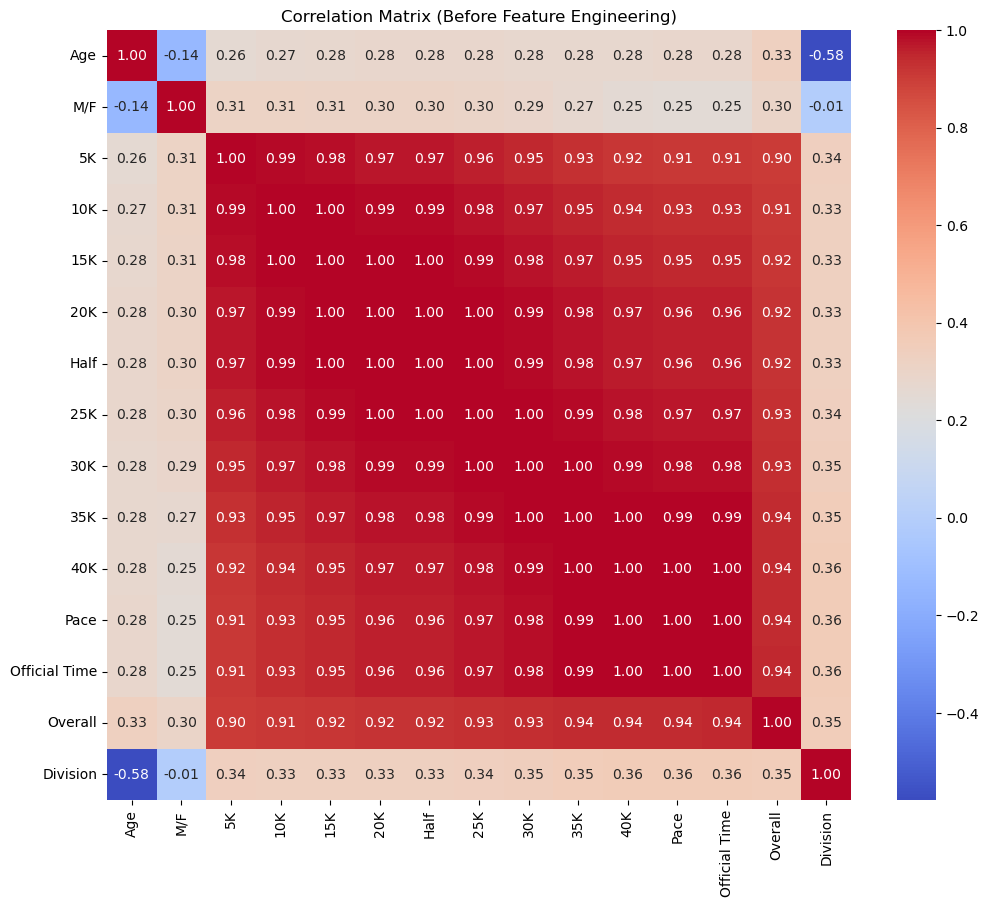

In [28]:
numerical_cols = combined_df.select_dtypes(include=['number'])
corr_matrix = numerical_cols.corr()

#visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Before Feature Engineering)")
plt.show()


In [29]:
#Unstack the correlation matrix to convert the matrix into a long format Dataframe
corr_unstacked = corr_matrix.unstack()

#sort by correlation values
corr_sorted = corr_unstacked.sort_values(ascending=False)

#filter out self-correlations (where a variable is correlated with itself)
corr_no_self = corr_sorted[corr_sorted != 1]

#Get the highest correlation
highest_corr = corr_no_self.head(1)
print("Highest Correlation:\n", highest_corr)

#Get the lowest correlation
lowest_corr = corr_no_self.tail(1)
print("\nLowest Correlation:\n", lowest_corr)

#Get the top N highest and lowest

n = 5 #number of top/bottom correlations
print(f"\nTop {n} Highest Correlations:\n", corr_no_self.head(n))
print(f"\nTop {n} Lowest Correlations:\n", corr_no_self.tail(n))
      

Highest Correlation:
 Half  20K    0.999879
dtype: float64

Lowest Correlation:
 Age  Division   -0.578951
dtype: float64

Top 5 Highest Correlations:
 Half           20K              0.999879
20K            Half             0.999879
Official Time  Pace             0.999748
Pace           Official Time    0.999748
               40K              0.999147
dtype: float64

Top 5 Lowest Correlations:
 M/F       Division   -0.011226
Age       M/F        -0.139779
M/F       Age        -0.139779
Division  Age        -0.578951
Age       Division   -0.578951
dtype: float64


Exploratory Data Analysis
 - Feature engineering 

In [31]:
#Split Time Ratios
print("Data types before ratio calculations:")
print(f"5K: {combined_df['5K'].dtype}, 10K: {combined_df['10K'].dtype}, Half: {combined_df['Half'].dtype}")
print(combined_df[['5K', '10K', 'Half']].head())  # Check for values

combined_df['5K_to_10K_ratio'] = combined_df['10K'] / combined_df['5K']
combined_df['10K_to_Half_ratio'] = combined_df['Half'] / combined_df['10K']
combined_df['Half_to_35K_ratio'] = combined_df['35K'] / combined_df['Half']

#Halfway Split Percentage
print("\nData types before percentage calculation:")
print(f"Half: {combined_df['Half'].dtype}, Official Time: {combined_df['Official Time'].dtype}")
print(combined_df[['Half', 'Official Time']].head())  # Check for values

combined_df['Halfway_Split_Percentage'] = (combined_df['Half'] / combined_df['Official Time']) * 100

Data types before ratio calculations:
5K: float64, 10K: float64, Half: float64
          5K        10K       Half
0  14.966667  29.666667  63.433333
1  14.966667  29.666667  63.450000
2  14.966667  29.650000  63.433333
3  14.950000  29.666667  63.433333
4  14.950000  29.666667  63.433333

Data types before percentage calculation:
Half: float64, Official Time: float64
        Half  Official Time
0  63.433333     126.850000
1  63.450000     127.350000
2  63.433333     127.450000
3  63.433333     127.883333
4  63.433333     128.783333


Pace Variations

In [33]:
#Split Time Ratios
combined_df['5K_to_10K_ratio'] = combined_df['10K'] / combined_df['5K']
combined_df['10K_to_Half_ratio'] = combined_df['Half'] / combined_df['10K']
combined_df['Half_to_35K_ratio'] = combined_df['35K'] / combined_df['Half']

In [34]:
#Halfway Split Percentage
combined_df['Halfway_Split_Percentage'] = (combined_df['Half'] / combined_df['Official Time']) * 100

In [35]:
#Distance of marathon in kilometers
marathon_distance_km = 42.195
combined_df['overall_pace'] = combined_df['Official Time'] / (marathon_distance_km * 1000) # pace in seconds/meter

combined_df['5K_pace'] = combined_df['5K'] / 5
combined_df['10K_pace'] = combined_df['10K'] / 10
combined_df['Half'] = combined_df['Half'] / 21.0975
combined_df['25K_pace'] = combined_df['25K'] / 25 
combined_df['35K_pace'] = combined_df['35K'] / 35
combined_df['40K_pace'] = combined_df['40K'] / 40

In [36]:
print("DataFrame columns after feature creation:")
print(combined_df.columns)

DataFrame columns after feature creation:
Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Division', '5K_to_10K_ratio', '10K_to_Half_ratio',
       'Half_to_35K_ratio', 'Halfway_Split_Percentage', 'overall_pace',
       '5K_pace', '10K_pace', '25K_pace', '35K_pace', '40K_pace'],
      dtype='object')


This code snippet does the following:

Calculates Pace Differences: It computes the difference in pace between various segments of the race (5K to 10K, 10K to Half, etc.). The final line calculates the pace from the 40k mark to the finish line by dividing the Official Time by the marathon distance (42.195 km). Calculates Pace Degradation: determines the percentage change in pace from the initial 5K to the halfway point and the 40K mark. Identifies Negative Splits: It creates a binary variable (negative_split) that indicates whether a runner ran the second half of the marathon faster than the first half.

In [38]:
# Pace Variation Between Segments
combined_df['5K_to_10K_pace_diff'] = combined_df['10K_pace'] - combined_df['5K_pace']
combined_df['10K_to_Half_pace_diff'] = combined_df['Half'] - combined_df['10K_pace']
combined_df['Half_to_35K_pace_diff'] = combined_df['35K_pace'] - combined_df['Half']
combined_df['35K_to_40K_pace_diff'] = combined_df['40K_pace'] - combined_df['35K_pace']
combined_df['40K_to_finish_pace_diff'] = (combined_df['Official Time'] / 42.195) - combined_df['40K_pace']

# Pace Degradation
combined_df['pace_degradation_half'] = ((combined_df['Half'] - combined_df['5K_pace']) / combined_df['5K_pace']) * 100
combined_df['pace_degradation_40K'] = ((combined_df['40K_pace'] - combined_df['5K_pace']) / combined_df['5K_pace']) * 100

# Early vs. Late Race Pace
combined_df['negative_split'] = (combined_df['Half'] < (combined_df['Official Time'] / 2)).astype(int)

print(combined_df[['5K_to_10K_pace_diff', 'pace_degradation_half', 'negative_split']].head())



   5K_to_10K_pace_diff  pace_degradation_half  negative_split
0            -0.026667               0.445725               1
1            -0.026667               0.472116               1
2            -0.028333               0.445725               1
3            -0.023333               0.557704               1
4            -0.023333               0.557704               1


Idetify Runners that have been in marathon more than once

In [40]:
import re

# 1. Calculate Race Year
def extract_year_from_filename(filename):
    match = re.search(r'marathon_results_(\d{4})\.csv', filename)
    if match:
        return int(match.group(1))
    else:
        return None  # Or raise an exception if no year is found

# Create a dictionary to map filenames to years
filename_year_map = {
    "marathon_results_2022.csv": 2022,
    "marathon_results_2023.csv": 2023,
    "marathon_results_2024.csv": 2024
}

#populate SourceFile to load the dataframes separately
df1['SourceFile'] = "marathon_results_2022.csv"
df2['SourceFile'] = "marathon_results_2023.csv"
df3['SourceFile'] = "marathon_results_2024.csv"
combined_df2 = pd.concat([df1, df2, df3])


# Apply the function to create a new column
combined_df['RaceYear'] = combined_df2['SourceFile'].apply(extract_year_from_filename)


# 2. Calculate Runner's Birth Year
combined_df['BirthYear'] = combined_df['RaceYear'] - combined_df['Age']

# 3. Clean and Standardize Names
def clean_name(name):
    name = name.lower()
    name = re.sub(r'[^a-z\s]', '', name)
    name = ' '.join(name.split())
    return name

combined_df['Cleaned_Name'] = combined_df['Name'].apply(clean_name)

# 4. Create a Unique Runner Key
combined_df['RunnerKey'] = combined_df['Cleaned_Name'] + '_' + combined_df['BirthYear'].astype(str)

# 5. Count Runner Appearances
runner_counts = combined_df['RunnerKey'].value_counts().reset_index()
runner_counts.columns = ['RunnerKey', 'Marathon_Count']

# Merge the counts back into the main DataFrame
combined_df = combined_df.merge(runner_counts, on='RunnerKey', how='left')

# Print the first few rows with the new key and counts
print(combined_df[['Name', 'Age', 'RaceYear', 'BirthYear', 'RunnerKey', 'Marathon_Count']].head())

# Drop the temporary columns
combined_df = combined_df.drop(columns=['Cleaned_Name', 'BirthYear'])

                Name  Age  RaceYear  BirthYear              RunnerKey  \
0      Chebet, Evans   33      2022       1989      chebet evans_1989   
1  Cherono, Lawrence   33      2022       1989  cherono lawrence_1989   
2    Kipruto, Benson   31      2022       1991    kipruto benson_1991   
3      Geay, Gabriel   25      2022       1997      geay gabriel_1997   
4     Kiptanui, Eric   31      2022       1991     kiptanui eric_1991   

   Marathon_Count  
0               3  
1               1  
2               2  
3               2  
4               1  


Age and Gender Specific - Feature Engineering

In [42]:
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-100'] 

In [43]:
#Create age groups
combined_df['AgeGroup'] = pd.cut(combined_df['Age'], bins=age_bins, labels=age_labels, right=False)

combined_df['AgeGenderGroup'] = combined_df['AgeGroup'].astype(str) + '_' + combined_df['M/F'].astype(str)

print(combined_df[['Age', 'M/F', 'AgeGroup', 'AgeGenderGroup']].head())


   Age  M/F AgeGroup AgeGenderGroup
0   33    0    30-34        30-34_0
1   33    0    30-34        30-34_0
2   31    0    30-34        30-34_0
3   25    0    25-29        25-29_0
4   31    0    30-34        30-34_0


In [44]:
# 1. Group and calculate the mean 'Official Time'
overall_age_bins = combined_df.groupby(['AgeGroup', 'M/F'])['Official Time'].mean().reset_index()

# 2.  Map M/F to Gender Labels for Plotting
gender_map = {0: 'M', 1: 'F', 2: 'Other'}  # Define the mapping
overall_age_bins['Gender'] = overall_age_bins['M/F'].map(gender_map)

# 3.  Adjust AgeGroup Labels to Match the Image
def format_age_group(age_group):
    try:
        lower, upper = map(int, age_group.split('-'))
        return f"({lower}, {upper}]"
    except AttributeError:
        return age_group # Handle potential non-string types

overall_age_bins['AgeGroup_Formatted'] = overall_age_bins['AgeGroup'].apply(format_age_group)


# 4. Create the bar plot with the desired formatting
fig = px.bar(
    overall_age_bins,
    x='AgeGroup_Formatted',  # Use the formatted age groups
    y='Official Time',
    color='Gender',          # Use the Gender labels for color
    barmode='group',
    labels={'AgeGroup_Formatted': 'Age Group', 'Official Time': 'Average Finish Time (Minutes)', 'Gender': 'M/F'}, # Corrected labels
    category_orders={'AgeGroup_Formatted': sorted(overall_age_bins['AgeGroup_Formatted'])}  # Ensure correct order
)

fig.update_layout(
    plot_bgcolor='rgba(240,248,255,0.5)',  # Light background color
    #  yaxis=dict(gridcolor='lightgray'), # Adjust gridline color
)

fig.show()

# 5.  Important Reminder (Adjusted)
print("\nIMPORTANT: 'M/F' is encoded as 0, 1, and 2 in this analysis.")
print("0: Male, 1: Female, 2: Other\n")

C:\Users\steph\AppData\Local\Temp\ipykernel_6872\1461028162.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_age_bins = combined_df.groupby(['AgeGroup', 'M/F'])['Official Time'].mean().reset_index()



IMPORTANT: 'M/F' is encoded as 0, 1, and 2 in this analysis.
0: Male, 1: Female, 2: Other



In [45]:
# 1. Define pace-related columns and distance mapping
avg_pace_cols = ['5K_pace', '10K_pace', 'Half', '25K_pace', '35K_pace', '40K_pace']  # Replace with your actual pace column names
col_mapping_divisors = {
    '5K_pace': 5,
    '10K_pace': 10,
    'Half': 21.0975,
    '25K_pace': 25,
    '30K_pace': 30,  # Assuming you have this
    '35K_pace': 35,
    '40K_pace': 40
}  # Distances in km

# 2. Group the DataFrame combined_df by 'M/F' and 'AgeGroup'
pace_decay_frame = combined_df.groupby(['M/F', 'AgeGroup'])[avg_pace_cols].mean()

# 3. Separate by Gender (adjust for your M/F encoding)
male_pace_decay_frame = pace_decay_frame.loc[(0)]  # Assuming 0 represents Male
female_pace_decay_frame = pace_decay_frame.loc[(1)]  # Assuming 1 represents Female

# 4. Initialize Figures
pace_decay_fig_m = go.Figure()
pace_decay_fig_m.layout.template = 'plotly_dark'
pace_decay_fig_m.update_layout(
    title='Average Male Pace Decay by Age Group',
    xaxis_title='Distance (km)',
    yaxis_title='Average Pace (min/km)'  # Adjusted y-axis label
)

pace_decay_fig_f = go.Figure()
pace_decay_fig_f.layout.template = 'plotly_dark'
pace_decay_fig_f.update_layout(
    title='Average Female Pace Decay by Age Group',
    xaxis_title='Distance (km)',
    yaxis_title='Average Pace (min/km)'
)

# 5. Plotting Loop - Males
for bucket in male_pace_decay_frame.index:
    pace_decay_fig_m.add_trace(
        go.Scatter(x=list(col_mapping_divisors.values()), y=list(male_pace_decay_frame.loc[bucket]), name=str(bucket))
    )

# 6. Plotting Loop - Females
for bucket in female_pace_decay_frame.index:
    pace_decay_fig_f.add_trace(
        go.Scatter(x=list(col_mapping_divisors.values()), y=list(female_pace_decay_frame.loc[bucket]), name=str(bucket))
    )

# 7. Show Figures
pace_decay_fig_m.show()
pace_decay_fig_f.show()

C:\Users\steph\AppData\Local\Temp\ipykernel_6872\664755039.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [46]:
print(combined_df.sample(20))

         Bib                 Name  Age  M/F                   City Country  \
41248  31219       Cotter, Daniel   34    0                 Mallow     IRL   
12683  17700        Berger, Kevin   56    0               Gibsonia     USA   
16065  21243     Bond, Caren-Anne   49    1           Indianapolis     USA   
62889  19022         Lynch, Katie   45    1                Needham     USA   
54089   3734        Grove, Morten   46    0         Kongens Lyngby     DEN   
37319   5730       Berquist, Gary   41    0                Findlay     USA   
63726  11175         Brucker, Ben   46    0             Springdale     USA   
5205    9880    Szachowicz, Marek   52    0            Boleslawiec     POL   
56000  14193  Ludington, Johannah   35    1            Morrisville     USA   
60334   3007    Salman, Abdulaziz   34    0              Abu Dhabi     UAE   
56238   7213          Crook, Josh   44    0               Saratoga     USA   
29559   3383           Hall, Matt   31    0         Citrus Heigh

In [47]:
#Age Pace Gender Relationship
combined_df['Age_x_Pace'] = combined_df['Age'] * combined_df['Overall']

print("data type of combined_df['Age'] before multipication:", combined_df['Age'].dtype)
print("data type of combined_df['M/F'] before multipication:", combined_df['M/F'].dtype)
combined_df['Age_x_Gender'] = combined_df['Age'] * combined_df['M/F']

data type of combined_df['Age'] before multipication: int64
data type of combined_df['M/F'] before multipication: int64


Capture potential non-linear realtionships between age and marathon performance

In [49]:
combined_df['Age_Squared'] = combined_df['Age']**2

In [50]:
combined_df.dtypes

Bib                           object
Name                          object
Age                            int64
M/F                            int64
City                          object
Country                       object
5K                           float64
10K                          float64
15K                          float64
20K                          float64
Half                         float64
25K                          float64
30K                          float64
35K                          float64
40K                          float64
Pace                         float64
Official Time                float64
Overall                        int64
Division                     float64
5K_to_10K_ratio              float64
10K_to_Half_ratio            float64
Half_to_35K_ratio            float64
Halfway_Split_Percentage     float64
overall_pace                 float64
5K_pace                      float64
10K_pace                     float64
25K_pace                     float64
3

In [51]:
def clean_time_string(time_str):
    """Cleans and standardizes time strings."""
    if pd.isna(time_str):
        return pd.NaT  # Handle missing values consistently

    # Remove any square brackets or other unwanted characters
    time_str = re.sub(r'\[|\]', '', str(time_str))

    # Try to handle various time formats
    parts = time_str.split(':')
    if len(parts) == 3:  # h:m:s
        return time_str
    elif len(parts) == 2:  # m:s
        return '00:' + time_str
    elif len(parts) == 1: # seconds
        return '00:00:' + time_str
    else:
        return pd.NaT  # Return NaT for unhandled formats

for series in list_timeseries:
    combined_df[series] = combined_df[series].apply(clean_time_string)
    combined_df[series] = pd.to_timedelta(combined_df[series], errors='coerce')

# Check dtypes AFTER timedelta conversion
print("Dtypes after timedelta conversion:")
print(combined_df[list_timeseries].dtypes)

#Convert Columns to mimnutes
columns_to_convert = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']  # Add all the columns you want to convert

for col in columns_to_convert:
    combined_df[col] = (combined_df[col].dt.total_seconds() / 60).astype(float)

# Check dtypes AFTER numeric conversion
print("\nDtypes after numeric conversion:")
print(combined_df[columns_to_convert].dtypes)

Dtypes after timedelta conversion:
5K               timedelta64[ns]
10K              timedelta64[ns]
15K              timedelta64[ns]
20K              timedelta64[ns]
Half             timedelta64[ns]
25K              timedelta64[ns]
30K              timedelta64[ns]
35K              timedelta64[ns]
40K              timedelta64[ns]
Pace             timedelta64[ns]
Official Time    timedelta64[ns]
dtype: object

Dtypes after numeric conversion:
5K               float64
10K              float64
15K              float64
20K              float64
Half             float64
25K              float64
30K              float64
35K              float64
40K              float64
Pace             float64
Official Time    float64
dtype: object


Visualize Feature Engineer data


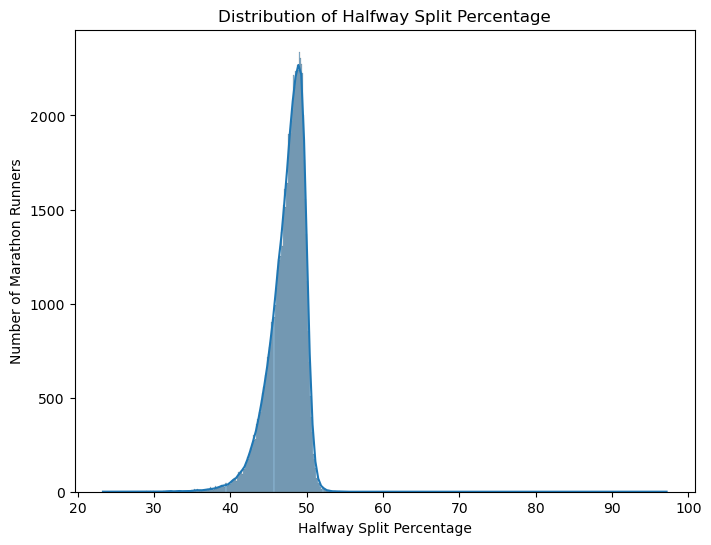

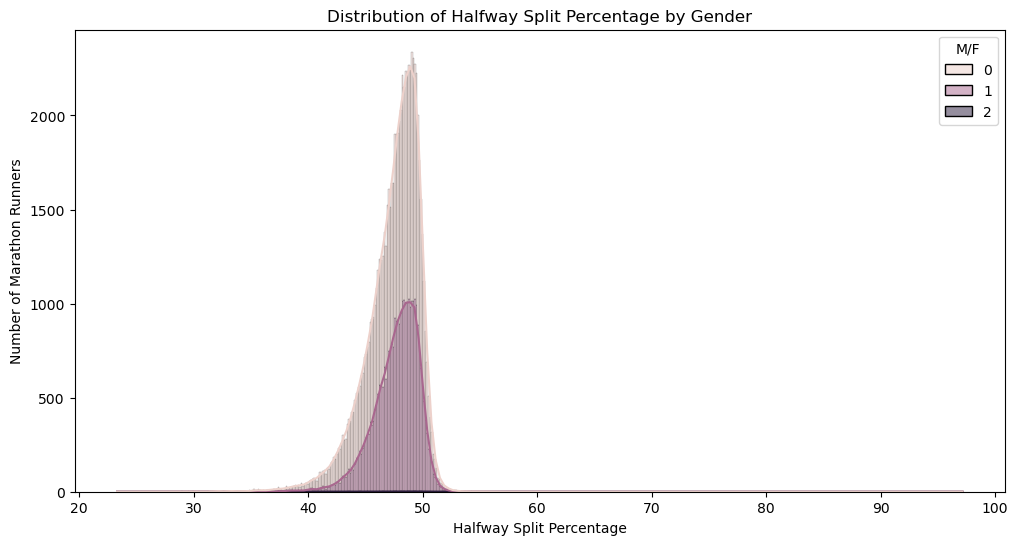

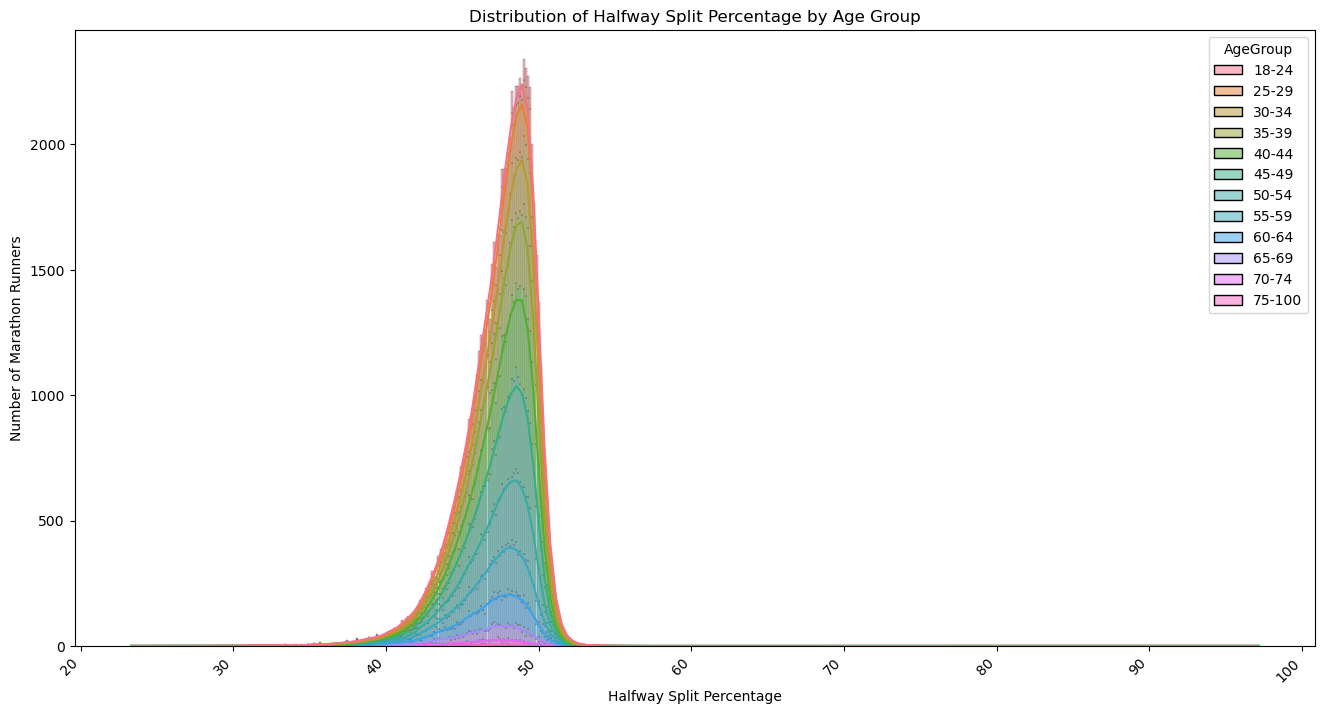

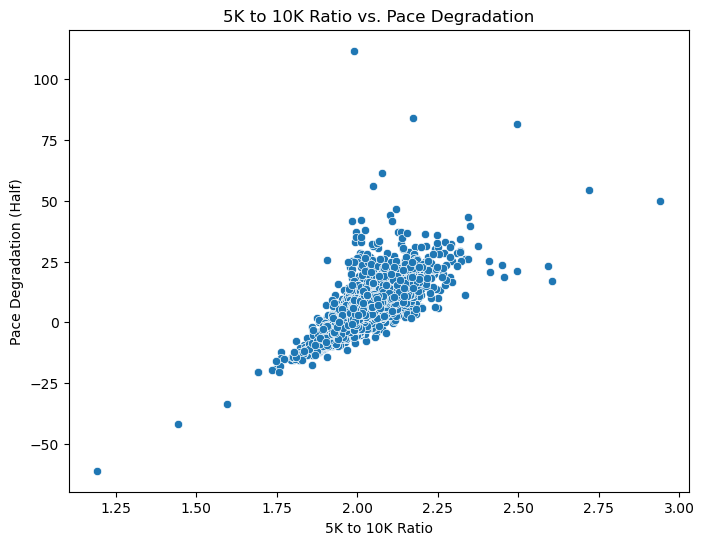

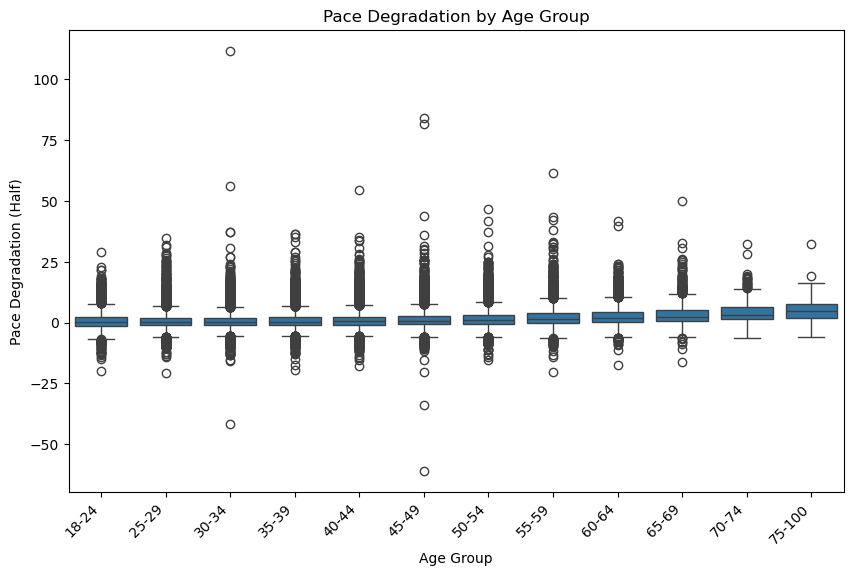

Text(0.5, 0, 'Slowing Down Compared to previous segment')

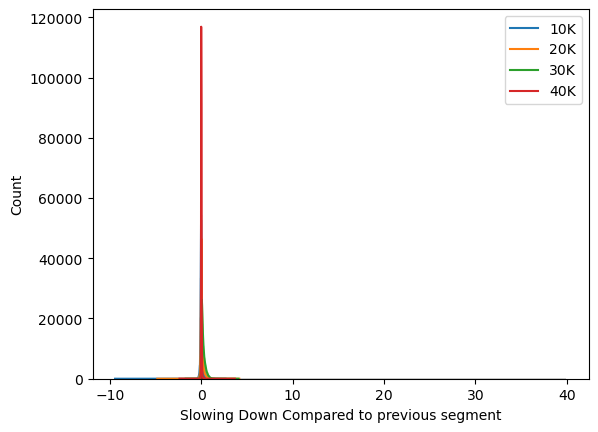

In [53]:
#Histogram of 'Halfway_Split_Percentage'
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Halfway_Split_Percentage'], kde=True)
plt.title('Distribution of Halfway Split Percentage')
plt.xlabel('Halfway Split Percentage')
plt.ylabel('Number of Marathon Runners')
plt.show()

#Histogram faceted by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='Halfway_Split_Percentage', hue='M/F', kde=True, multiple="stack")
plt.title('Distribution of Halfway Split Percentage by Gender')
plt.xlabel('Halfway Split Percentage')
plt.ylabel('Number of Marathon Runners')
plt.show()

# Histogram faceted by age group
plt.figure(figsize=(16, 8))
sns.histplot(data=combined_df, x='Halfway_Split_Percentage', hue='AgeGroup', kde=True, multiple="stack")
plt.title('Distribution of Halfway Split Percentage by Age Group')
plt.xlabel('Halfway Split Percentage')
plt.ylabel('Number of Marathon Runners')
plt.xticks(rotation=45, ha="right")
plt.show()

#Scatter plot of '5K_to_10K_ratio' vs. 'pace_degradation_half'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='5K_to_10K_ratio', y='pace_degradation_half', data=combined_df)
plt.title('5K to 10K Ratio vs. Pace Degradation')
plt.xlabel('5K to 10K Ratio')
plt.ylabel('Pace Degradation (Half)')
plt.show()

#Box plot of 'pace_degradation_half' by 'AgeGroup'
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='pace_degradation_half', data=combined_df)
plt.title('Pace Degradation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Pace Degradation (Half)')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.show()

sns.histplot(data=combined_df, x='5K_to_10K_pace_diff',bins=np.arange(-5,40,0.10), kde=True, multiple="stack")
sns.histplot(data=combined_df, x='10K_to_Half_pace_diff',bins=np.arange(-5,40,0.10), kde=True, multiple="stack")
sns.histplot(data=combined_df, x='Half_to_35K_pace_diff',bins=np.arange(-5,40,0.10), kde=True, multiple="stack")
sns.histplot(data=combined_df, x='40K_to_finish_pace_diff',bins=np.arange(-5,40,0.10), kde=True, multiple="stack")
plt.legend(['10K','20K','30K','40K'])
plt.xlabel('Slowing Down Compared to previous segment')

First Graph: Distribution of Halway Split Percentage

Peak Around 47-49%: The highest point of the curve is around 47-49%. This indicates that most runners complete the first half of the marathon slightly faster than the second half.
Skew to the Right: The distribution has a tail extending to the right. This means that there are more runners who have a significantly slower second half than runners who have a significantly faster second half.
Few Runners with Very Fast First Halves: There are very few runners on the left side of the graph (below 40%). This indicates that very few runners start the marathon extremely fast relative to their overall pace.

Box Plot: 

Y-axis (Pace Degradation (Half)): This axis represents the pace degradation during the second half of the marathon.
Positive Values: Indicate that runners in that age group ran the second half slower than the first half (positive split).
Negative Values: Indicate that runners in that age group ran the second half faster than the first half (negative split).
Zero: Indicates an even split (no change in pace).

Median Pace Degradation: The median line in most boxes is slightly above zero. This suggests that, on average, most age groups tend to slow down in the second half of the marathon.
Variability: The boxes and whiskers show the variability in pace degradation within each age group. Some age groups have wider boxes and longer whiskers, indicating more variability in pace degradation.
Outliers: There are outliers in all age groups, suggesting that some runners experience significant pace changes (either slowing down or speeding up).



Correlation Matrix After Feature Engineering

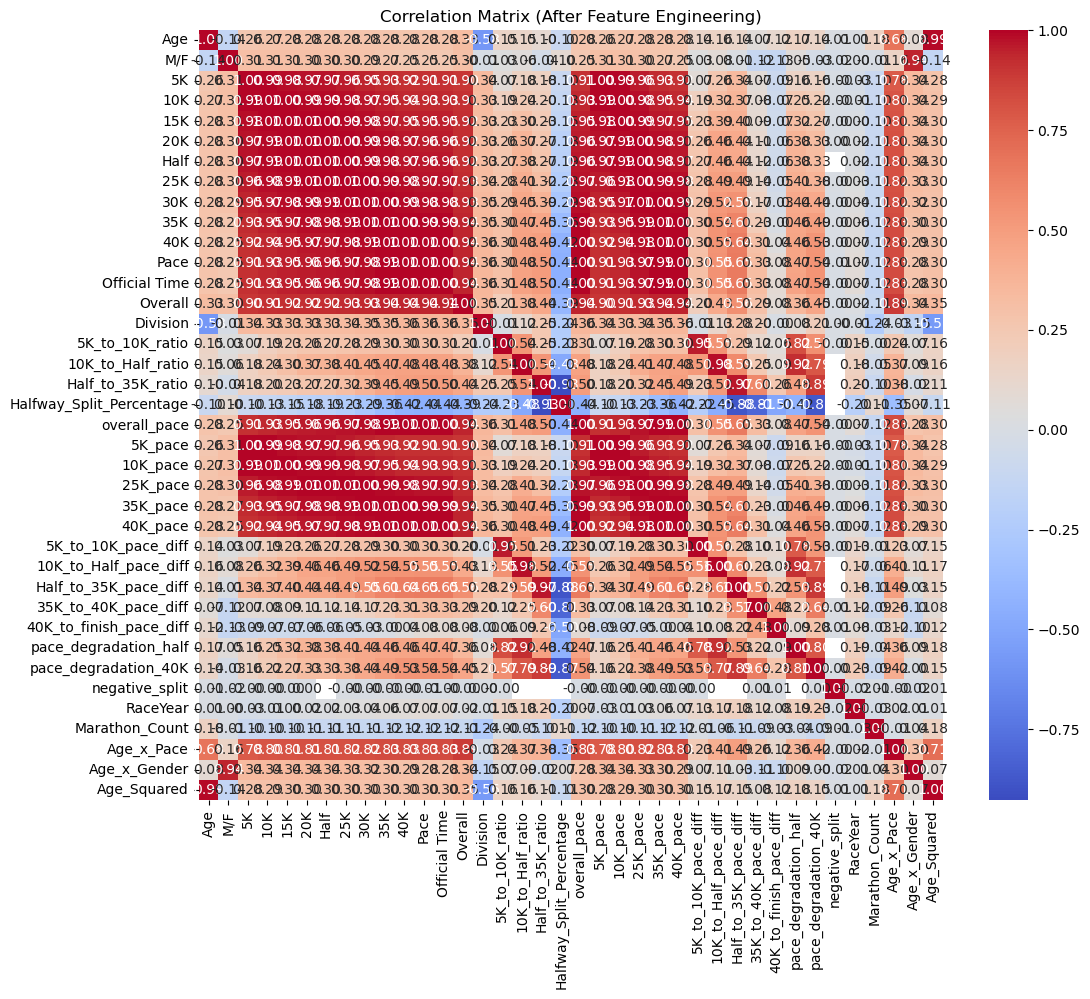

In [56]:
#Select Numerical Columns
numerical_cols = combined_df.select_dtypes(include=['number'])
corr_matrix = numerical_cols.corr()

#Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (After Feature Engineering)")
plt.show()

Machine Learning Process 

In [58]:
# 1. Filter for Runners Who Ran All Three Years
three_year_runners_df = combined_df[combined_df['Marathon_Count'] == 3].copy()

# 2. Calculate Best Official Time
best_times = three_year_runners_df.groupby('RunnerKey')['Official Time'].min().reset_index()
best_times.columns = ['RunnerKey', 'Best_Official_Time']

# 3. Merge Best Times
three_year_runners_df = three_year_runners_df.merge(best_times, on='RunnerKey', how='left')

# 4. Sort and Select Top 100 Runners
top_100_runners = three_year_runners_df.sort_values('Best_Official_Time').head(100)['RunnerKey'].unique()

# 5. Filter the Main DataFrame for Top 100 Runners
ml_df_top_100 = combined_df[combined_df['RunnerKey'].isin(top_100_runners)].copy()

# --- Data Preparation for ml_df_top_100 ---

# 1. Feature Engineering (using available columns)
ml_df_top_100['Half_to_Official_Time_Diff'] = ml_df_top_100['Official Time'] - ml_df_top_100['Half']
ml_df_top_100['5K_to_Half_Diff'] = ml_df_top_100['Half'] - ml_df_top_100['5K']
ml_df_top_100['35K_to_Official_Diff'] = ml_df_top_100['Official Time'] - ml_df_top_100['35K']
ml_df_top_100['Age_Pace_Interaction'] = ml_df_top_100['Age'] * ml_df_top_100['Pace']
ml_df_top_100['Age_Official_Time_Interaction'] = ml_df_top_100['Age'] * ml_df_top_100['Official Time']

# 2. Handle Missing Values (impute with mean)
numerical_cols = ml_df_top_100.select_dtypes(include=np.number).columns
for col in numerical_cols:
    ml_df_top_100[col].fillna(ml_df_top_100[col].mean(), inplace=True)

# 3. Handle Categorical Variables (Example: One-hot encoding)
categorical_cols = ml_df_top_100.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop(['Bib', 'Name', 'City', 'Country'])
ml_df_top_100 = pd.get_dummies(ml_df_top_100, columns=categorical_cols, drop_first=True)

#4. Handle AgeGroup and AgeGenderGroup
def age_range_to_mean(age_range):
    try:
        lower, upper = map(int, age_range.split('-'))
        return (lower + upper) / 2
    except ValueError:
        return np.nan

ml_df_top_100['AgeGroup_Mean'] = ml_df_top_100['AgeGroup'].apply(age_range_to_mean)


# 5. Convert AgeGroup_Mean to numerical and handle missing values
ml_df_top_100['AgeGroup_Mean'] = pd.to_numeric(ml_df_top_100['AgeGroup_Mean'], errors='coerce')
ml_df_top_100['AgeGroup_Mean'].fillna(ml_df_top_100['AgeGroup_Mean'].mean(), inplace=True)


# 6. Drop original AgeGroup column and other object columns
columns_to_drop = ['AgeGroup', 'Bib', 'Name', 'City', 'Country' ]
columns_to_drop = [col for col in columns_to_drop if col in ml_df_top_100.columns]
ml_df_top_100.drop(columns_to_drop, axis=1, inplace=True)


# 7. Remove Highly Correlated Columns
correlation_matrix = ml_df_top_100.drop('Pace', axis=1).corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
print(f"Columns to drop: {to_drop}")
ml_df_top_100.drop(to_drop, axis=1, inplace=True)

# 8. Feature Scaling (Standardization)
scaler = StandardScaler()
numerical_cols = ml_df_top_100.select_dtypes(include=np.number).columns
ml_df_top_100[numerical_cols] = scaler.fit_transform(ml_df_top_100[numerical_cols])

# --- Model Training and Evaluation ---

# 1. Prepare Data for Modeling
X = ml_df_top_100.drop('Pace', axis=1) # features
y = ml_df_top_100['Pace'] # target

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Linear Regression Model (You can substitute with other models)
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Columns to drop: ['10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Official Time', 'overall_pace', '5K_pace', '10K_pace', '25K_pace', '35K_pace', '40K_pace', '5K_to_10K_pace_diff', '10K_to_Half_pace_diff', 'Half_to_35K_pace_diff', 'Age_x_Pace', 'Age_x_Gender', 'Age_Squared', 'Half_to_Official_Time_Diff', '5K_to_Half_Diff', 'Age_Official_Time_Interaction', 'AgeGroup_Mean']
Mean Squared Error: 0.06299412442169353
R-squared: 0.9410931087599106


C:\Users\steph\AppData\Local\Temp\ipykernel_6872\2118892718.py:29: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\steph\AppData\Local\Temp\ipykernel_6872\2118892718.py:49: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [59]:
ml_df_top_100.columns

Index(['Age', 'M/F', '5K', 'Pace', 'Overall', 'Division', '5K_to_10K_ratio',
       '10K_to_Half_ratio', 'Half_to_35K_ratio', 'Halfway_Split_Percentage',
       '35K_to_40K_pace_diff', '40K_to_finish_pace_diff',
       'pace_degradation_half', 'pace_degradation_40K', 'negative_split',
       'RaceYear', 'Marathon_Count', '35K_to_Official_Diff',
       'Age_Pace_Interaction', 'RunnerKey_batty miles_1988',
       'RunnerKey_blas wayne_1978', 'RunnerKey_caron patrick_1998',
       'RunnerKey_castronuovo vinny_2000', 'RunnerKey_chebet evans_1989',
       'RunnerKey_collins liam_1997', 'RunnerKey_degen george_1993',
       'RunnerKey_dever shaun_1987', 'RunnerKey_dombi zach_1995',
       'RunnerKey_eccher nick_1995', 'RunnerKey_fazioli samuel_1992',
       'RunnerKey_haiss max_1994', 'RunnerKey_hamilton tyler_1990',
       'RunnerKey_hillard matthew_1990', 'RunnerKey_hinrichsen erik_1989',
       'RunnerKey_howell jason_1983', 'RunnerKey_kiplagat edna_1980',
       'RunnerKey_korir albert_1

SCATTERPLOT: residuals = y_test - y_pred which calculates the difference between the actual 'Pace' values (y_test) versus the predicted 'Pace' values (y_pred). If the residuals are randomly scattered around the horizontal line at y=0, it suggests that the model is a good fit. If there are any patterns in the residuals (i.e. curved or funnel shape) it might indicate the the model is not capturing some underlying relationships in the data. Outliers in the residual plot can indicate data points that are poorly predicted by the model. 

HISTOGRAM: Normal distribution (ideally) the residuals should be normally distributed around zero. Skewed residuals can indicate that the model is systematically overestimating or underestimating the target variable. Heavy tails in the distribution can indicate the presence of outliers. 

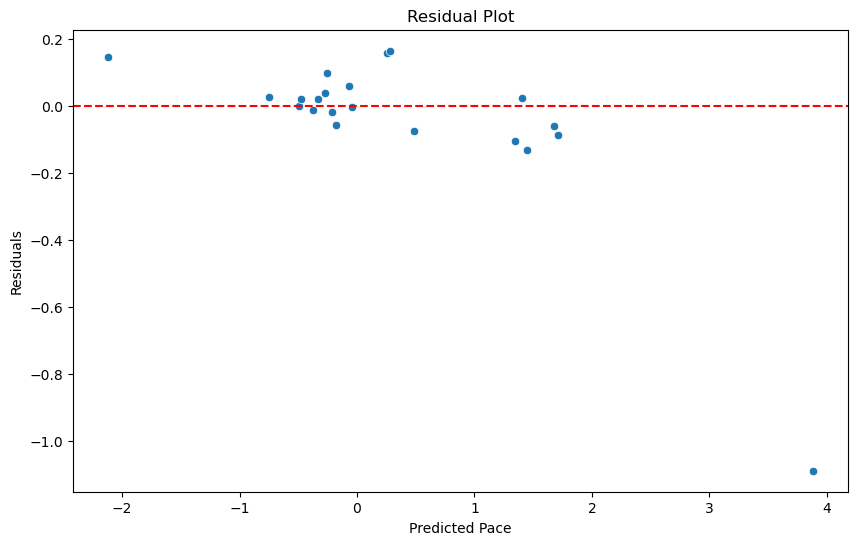

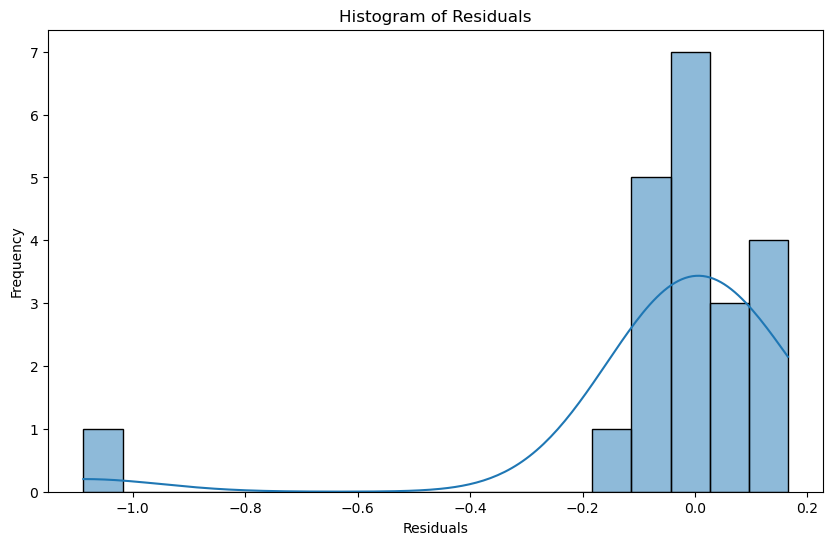

In [61]:
# 6. Residual Analysis
residuals = y_test - y_pred

# Plotting Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel('Predicted Pace')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Optional: Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Model: Linear Regression
Mean Squared Error: 0.0646569163997918
R-squared: 0.9395382033285241
--------------------
Model: Random Forest Regressor
Mean Squared Error: 0.04702041902189334
R-squared: 0.9560303959327316
--------------------
Model: Gradient Boosting Regressor
Mean Squared Error: 0.011269535240544793
R-squared: 0.9894616634037616
--------------------


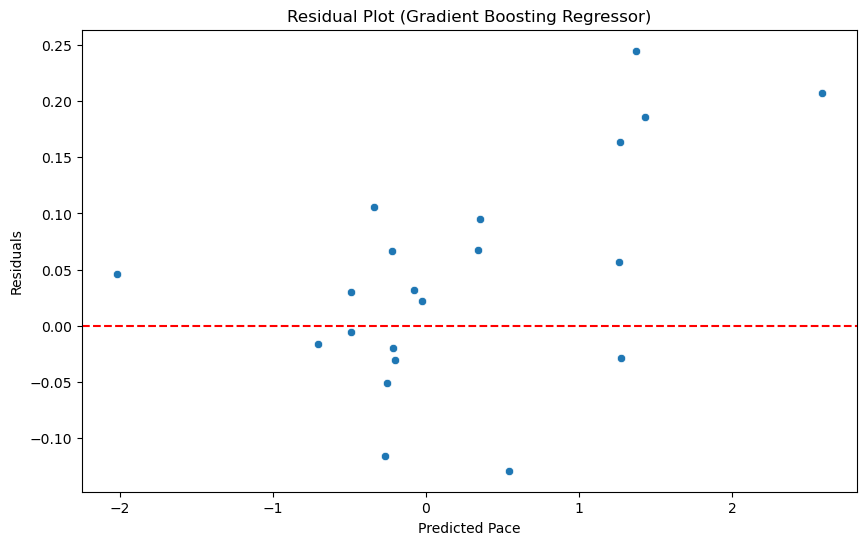

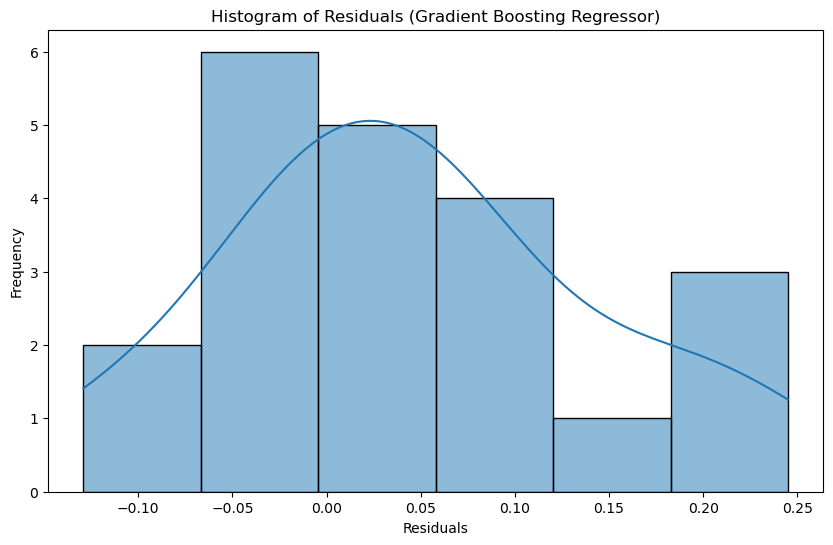

In [62]:
# --- Compare with other Regression Models ---

# 1. Prepare Data for Modeling (same as before)
X = ml_df_top_100.drop('Pace', axis=1)
y = ml_df_top_100['Pace']

# 2. Split Data into Training and Testing Sets (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling (Standardization) (same as before)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train and Evaluate Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R-squared": r2, "y_pred": y_pred}

# 5. Display Results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print("-" * 20)

# Residual Plots (for the best performing model)
best_model_name = min(results, key=lambda k: results[k]['MSE'])
best_model = models[best_model_name]
best_y_pred = best_model.predict(X_test_scaled)
best_residuals = y_test - best_y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_y_pred, y=best_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Pace')
plt.ylabel('Residuals')
plt.title(f'Residual Plot ({best_model_name})')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(best_residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Histogram of Residuals ({best_model_name})')
plt.show()

In [63]:
ml_df_top_100.columns

Index(['Age', 'M/F', '5K', 'Pace', 'Overall', 'Division', '5K_to_10K_ratio',
       '10K_to_Half_ratio', 'Half_to_35K_ratio', 'Halfway_Split_Percentage',
       '35K_to_40K_pace_diff', '40K_to_finish_pace_diff',
       'pace_degradation_half', 'pace_degradation_40K', 'negative_split',
       'RaceYear', 'Marathon_Count', '35K_to_Official_Diff',
       'Age_Pace_Interaction', 'RunnerKey_batty miles_1988',
       'RunnerKey_blas wayne_1978', 'RunnerKey_caron patrick_1998',
       'RunnerKey_castronuovo vinny_2000', 'RunnerKey_chebet evans_1989',
       'RunnerKey_collins liam_1997', 'RunnerKey_degen george_1993',
       'RunnerKey_dever shaun_1987', 'RunnerKey_dombi zach_1995',
       'RunnerKey_eccher nick_1995', 'RunnerKey_fazioli samuel_1992',
       'RunnerKey_haiss max_1994', 'RunnerKey_hamilton tyler_1990',
       'RunnerKey_hillard matthew_1990', 'RunnerKey_hinrichsen erik_1989',
       'RunnerKey_howell jason_1983', 'RunnerKey_kiplagat edna_1980',
       'RunnerKey_korir albert_1

In [64]:
print(y_test.index) # Print the index of y_test
print(combined_df.index) # Print the index of combined_df
print(combined_df.head()) # Inspect the first few rows of combined_df

Index([  942, 25921, 25147, 24933, 24912, 24895, 51680, 24923,    65,     0,
         118,  1190, 52190, 51559, 51503,    32, 51528,  3665,    79,   246,
       52529],
      dtype='int64')
RangeIndex(start=0, stop=77012, step=1)
  Bib               Name  Age  M/F      City Country        5K       10K  \
0   4      Chebet, Evans   33    0  Kapsabet     KEN  0.249444  0.494444   
1   5  Cherono, Lawrence   33    0   Eldoret     KEN  0.249444  0.494444   
2   1    Kipruto, Benson   31    0  Kapsabet     KEN  0.249444  0.494167   
3   9      Geay, Gabriel   25    0     Tampa     USA  0.249167  0.494444   
4  11     Kiptanui, Eric   31    0       NaN     KEN  0.249167  0.494444   

        15K       20K  ...  pace_degradation_40K  negative_split  RaceYear  \
0  0.745833  1.000833  ...              0.584633               1      2022   
1  0.745833  1.000556  ...              0.835189               1      2022   
2  0.745833  1.000556  ...              0.849109               1      2022   
3

In [65]:
print(ml_df_top_100.index) # Print index of ml_df_top_100 (assuming it's RunnerKey)
print(combined_df['RunnerKey'].unique()) # Print unique RunnerKey values in combined_df

Index([    0,     5,    12,    13,    32,    34,    42,    43,    52,    61,
       ...
       51692, 51748, 52000, 52004, 52124, 52190, 52356, 52454, 52529, 58979],
      dtype='int64', length=102)
['chebet evans_1989' 'cherono lawrence_1989' 'kipruto benson_1991' ...
 'bin mohd ali mohamad taufik_1978' 'mey johnny_1984' 'weiland gary_1980']


In [156]:
# --- Final Results: Actual vs. Predicted Times with Runner Names ---

# 1. Determine the best performing model (based on MSE from previous analysis)
best_model_name = min(results, key=lambda k: results[k]['MSE'])
best_y_pred = results[best_model_name]['y_pred']

# 2. Identify RunnerKey columns
runner_key_cols = [col for col in ml_df_top_100.columns if 'RunnerKey_' in col]

# 3. Function to extract name from RunnerKey column
def get_runner_name(row):
    for col in runner_key_cols:
        if row[col]:
            return col.replace('RunnerKey_', '').rsplit('_', 1)[0]
    return None

# 4. Create a list to store runner names corresponding to the test set
runner_names = []
for index in y_test.index:
    runner_row = ml_df_top_100.loc[index]
    runner_name = get_runner_name(runner_row)
    runner_names.append(runner_name)

# 5. Create the DataFrame for comparison
final_predictions_df = pd.DataFrame({
    "Name": runner_names,
    "Actual Pace": y_test,
    "Predicted Pace": best_y_pred
})

# 6. Convert 'Pace' to actual time (for example, in minutes)
final_predictions_df['Actual Time (mins)'] = final_predictions_df['Actual Pace']
final_predictions_df['Predicted Time (mins)'] = final_predictions_df['Predicted Pace']

# 7. Display the results
print("Final Results DataFrame with Names:")
print(final_predictions_df.head())
print("\nSample of Name Column:")
print(final_predictions_df['Name'].head())

Final Results DataFrame with Names:
                  Name  Actual Pace  Predicted Pace  Actual Time (mins)  \
942       degen george     1.431454        1.268158            1.431454   
25921  rosenkranz josh     1.318065        1.260921            1.318065   
25147    kiplagat edna     0.410946        0.540103            0.410946   
24933    caron patrick    -0.231597       -0.211543           -0.231597   
24912        haiss max    -0.382783       -0.266545           -0.382783   

       Predicted Time (mins)  
942                 1.268158  
25921               1.260921  
25147               0.540103  
24933              -0.211543  
24912              -0.266545  

Sample of Name Column:
942         degen george
25921    rosenkranz josh
25147      kiplagat edna
24933      caron patrick
24912          haiss max
Name: Name, dtype: object


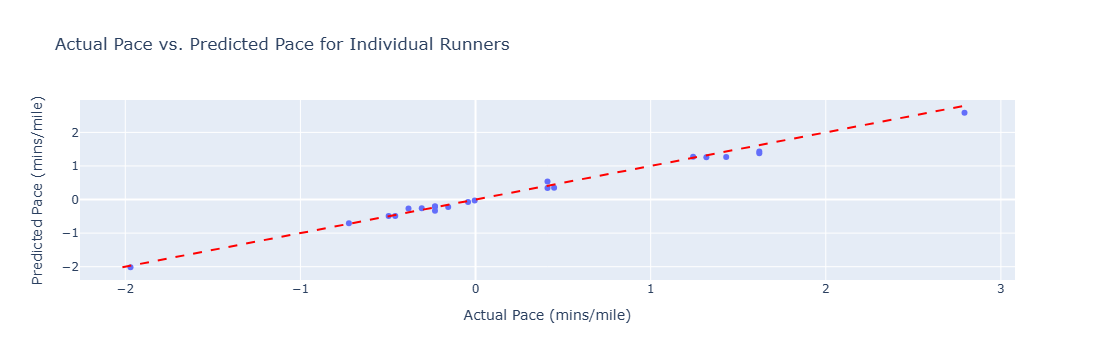

In [159]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=final_predictions_df['Actual Pace'],
    y=final_predictions_df['Predicted Pace'],
    mode='markers',
    text=final_predictions_df['Name'],
    hovertemplate='<b>Name</b>: %{text}<br>' +
                  'Actual Pace: %{x}<br>' +
                  'Predicted Pace: %{y}<extra></extra>'
))

fig.update_layout(
    title='Actual Pace vs. Predicted Pace for Individual Runners',
    xaxis_title='Actual Pace (mins/mile)',
    yaxis_title='Predicted Pace (mins/mile)',
    hovermode='closest'
)

# Add a diagonal line for reference
min_val = min(final_predictions_df['Actual Pace'].min(), final_predictions_df['Predicted Pace'].min())
max_val = max(final_predictions_df['Actual Pace'].max(), final_predictions_df['Predicted Pace'].max())
fig.add_shape(type='line',
              x0=min_val,
              y0=min_val,
              x1=max_val,
              y1=max_val,
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()